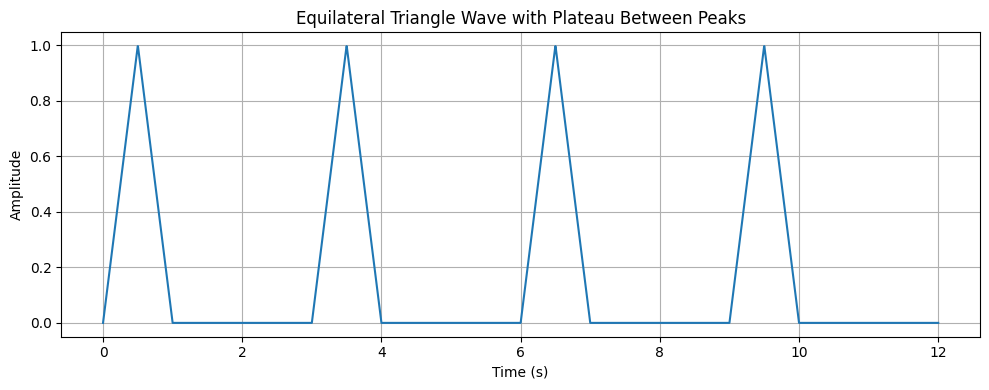

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


period = 3
plateau_width = 2
ramp_width = (period - plateau_width) / 2 

samples_per_period = 1000
t = np.linspace(0, period, samples_per_period)
wave = np.zeros_like(t)

ramp_up_start = 0
ramp_up_end = ramp_up_start + ramp_width
ramp_down_start = ramp_up_end
ramp_down_end = ramp_down_start + ramp_width
plateau_start = ramp_down_end
plateau_end = plateau_start + plateau_width


for i in range(len(t)):
    if t[i] < ramp_up_end:
        wave[i] = (t[i] - ramp_up_start) / ramp_width 
    elif t[i] < ramp_down_end:
        wave[i] = 1.0 - ((t[i] - ramp_up_end) / ramp_width) 
    elif t[i] < plateau_end:
        wave[i] = 0.0  
    else:
        wave[i] = 0.0 

num_periods = 4
t_full = np.tile(t, num_periods) + np.repeat(np.arange(num_periods) * period, samples_per_period)
wave_full = np.tile(wave, num_periods)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t_full, wave_full)
plt.title("Equilateral Triangle Wave with Plateau Between Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
dt = np.mean(np.diff(t))
sampling_rate = 1/dt
n = len(wave_full)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Remove DC component
wave_full_zero_mean = wave_full - np.mean(wave_full)

# Recompute FFT
fft_values = np.fft.fft(wave_full_zero_mean)
magnitude = np.abs(fft_values)

# Consider only the positive half of the spectrum
half_n = n // 2
frequencies = frequencies[:half_n]

# Find the dominant frequency
dominant_freq = frequencies[np.argmax(magnitude)]

dominant_freq * 60 # Blinks per minute

19.98

In [ ]:
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3

last = m+n-1

while (m > 0) and (n > 0):
    if nums1[m - 1] >= nums2[n - 1]:
        print(nums1[m-1], nums2[n-1])
        nums1[last] = nums1[m-1]
        m-=1
        
    else:
        print(nums1[m-1], nums2[n-1])
        nums1[last] = nums2[n-1]
        n-=1
    
    last -= 1
        
while (n > 0):
    nums1[last] = nums2[n]
    n-=1
    last-=1       


3 6
3 5
3 2
2 2
1 2


[1, 2, 2, 3, 5, 6]

In [ ]:
numbers = [-1, 0]
target = -1

i = 0
j = len(numbers) - 1

while (i != j):
    sum = numbers[i] + numbers[j]
    if sum == target:
        print( [i+1, j+1])
        break
    elif sum > target:
        j -= 1
    elif sum < target:
        i +=1
        


[1, 2]


In [80]:
prices = [2, 1, 4]

max_difference = 0
min_price = float('inf')

for price in prices:
    if price < min_price:
        min_price = price
    else:
        max_difference = max(max_difference, price - min_price)


        
max_difference

3

In [ ]:

s = "3[a]2[bc]"
stack = []
current_num = 0
current_str = ""


for char in s:
    if char.isnumeric():
        current_num = current_num * 10 + int(char)
    elif char == "[":
        stack.append((current_num, current_str))
        current_num = 0
        current_str = ''
    elif char == "]":
        prev_num, prev_str = stack.pop()
        current_str = prev_str + prev_num*current_str
    else:
        current_str += char

current_str

'aaabcbc'

In [23]:
s = "bbbbb"
seen = set()
maxv = 0
i = 0
for char in s:
    print(char)
    if char in seen:
        print("hi")
        maxv = max(i, maxv)
        i = 0
        seen = set()
    else:
        seen.add(char)
        i+=1
        
maxv = max(maxv, i)

maxv

b
b
hi
b
b
hi
b


1

In [ ]:
arr = [1,2,3,4,5]
k = 4
x = -1


def isCloser(a, b, x):
    abs_a = abs(a-x)
    abs_b = abs(b-x)
    if abs_a != abs_b:
        return (abs_a < abs_b)
    else:
        return a < b

i = 0
j = len(arr) - 1


while (i <= j):
    left = arr[i]
    right = arr[j]

    if (j-i) + 1 > k:
        if isCloser(left, right, x):
            j-=1
        else:
            i+=1
    elif (j-i)+1 ==k:
        print(arr[i:j+1])
        break

True
[1, 2, 3, 4]


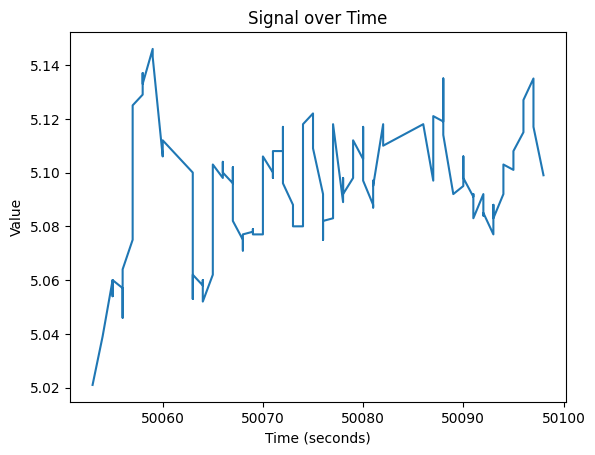

Average time step dt: 0.30603448275862066 seconds
Peak frequency: 8.844646828338453 Hz


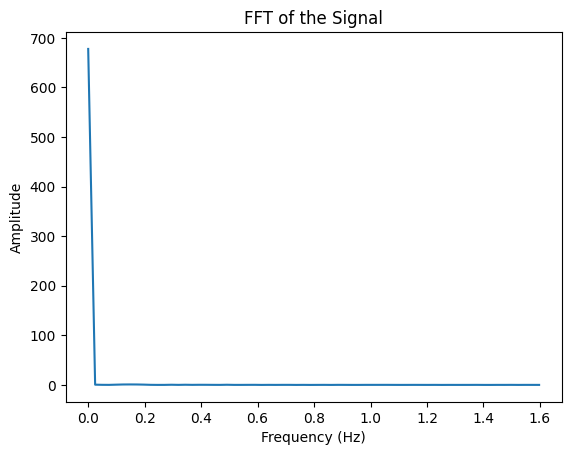

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data_log.csv')
data['seconds'] = pd.to_timedelta(data['time']).dt.total_seconds()

# Plot the signal starting from index 100
plt.plot(data['seconds'][100:], data['value'][100:])
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.title('Signal over Time')
plt.show()

# Calculate average time step
dt = np.mean(np.diff(data['seconds']))
print(f"Average time step dt: {dt} seconds")

# Extract the signal
signal = data['value'][100:]

# Run FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=dt)

# Take only the positive part of the spectrum
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft = np.abs(fft_result[:len(frequencies)//2])

# Find the frequency with the maximum amplitude (ignoring DC if needed)
idx = np.argmax(positive_fft[1:]) + 1
peak_freq = positive_freqs[idx] * 60

print(f"Peak frequency: {peak_freq} Hz")

# Plot FFT result
plt.plot(positive_freqs, positive_fft)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of the Signal')
plt.show()
